# 1 - Introduction

### Name : Hedy Fernando
### Batch : 001-HCK
### Data-Set : ftds-hacktiv8-project.phase1_ftds_001_hck.heart-failure
### Objective :  Model untuk memprediksi apakah seorang pasien akan meninggal atau tidak.

## BiqQuery

select * from `ftds-hacktiv8-project.phase1_ftds_001_hck.heart-failure`

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTENC
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# 3 - Data Loading

In [2]:
# Import Data-set with pandas

data = pd.read_csv('h8dsft_P1G3_hedy_fernando.csv')

In [3]:
# Show Top Data

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [4]:
# Show Bottom Data

data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [5]:
# Show info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Nilai Data berbobot sama tanpa ada nilai kosong.

- Data Numerik : 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium', 'time'

- Data Category : 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT'

In [6]:
# Show Central Tendency data

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Tidak terlihat ada anomali pada Data-Set.

In [7]:
# Check Duplicated data

data.duplicated().sum()

0

Tidak terdapat data duplicat di data-set.

In [8]:
# Check Null Value

data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat Missing Value pada data-set.

# 4 - EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


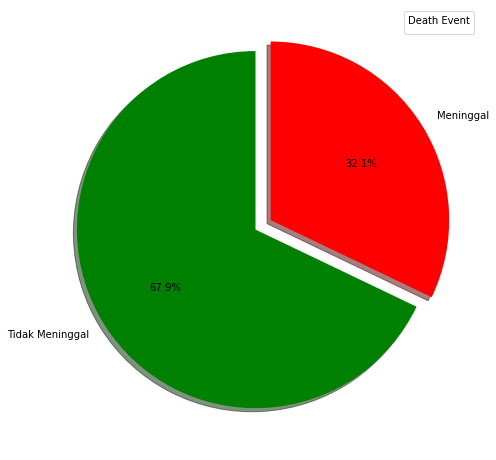

In [9]:
# Create pie chart Target

labels = ['Tidak Meninggal', 'Meninggal']
explode = (0.0, 0.1)
color = ['green','red']

plt.figure(figsize=(8,10))
plt.legend(title = "Death Event")
plt.pie(data['DEATH_EVENT'].value_counts(), explode=explode,colors=color, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Dari grafik di atas kita ketahui bahwa jumlah yang meninggal sejumlah 32.1% dari total pasien 299 orang. Kita akan lakukan analisis lebih lanjut faktor apa yang mempengaruhi kematian seorang pasien.

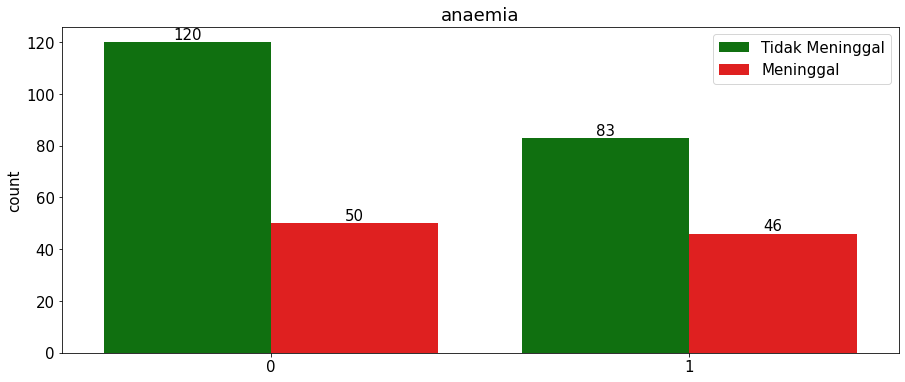

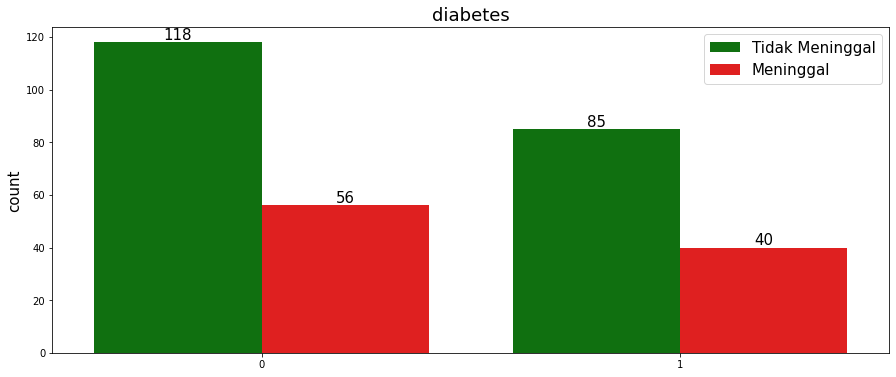

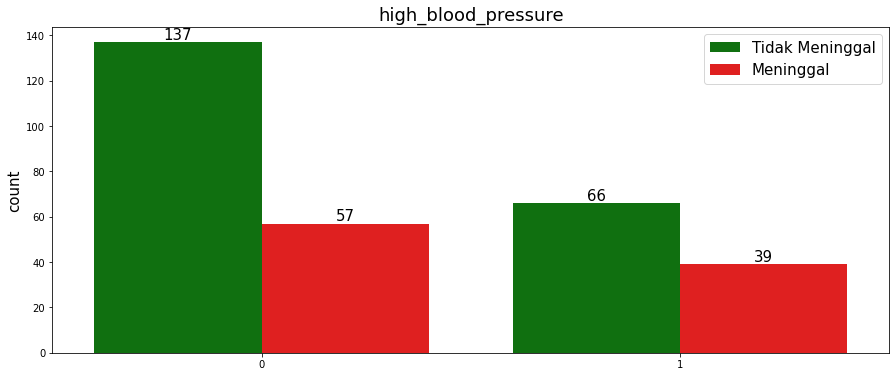

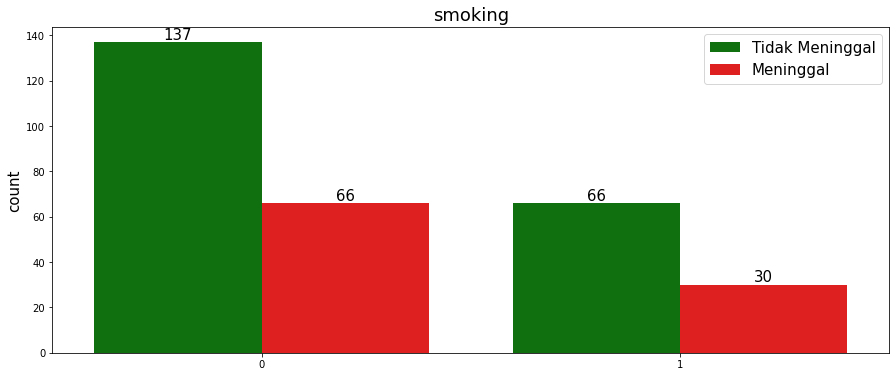

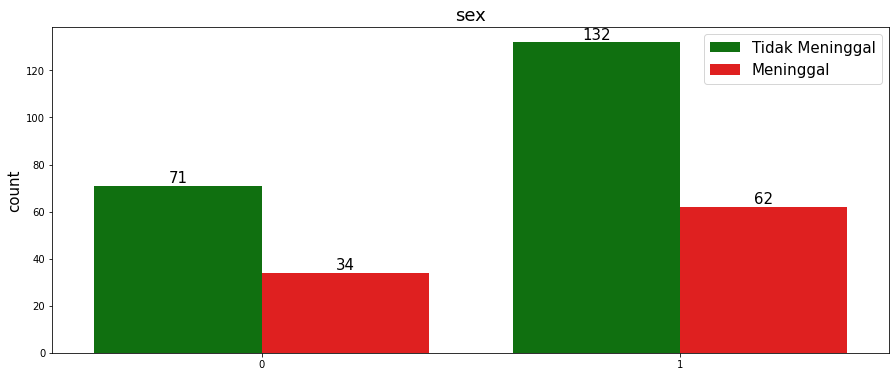

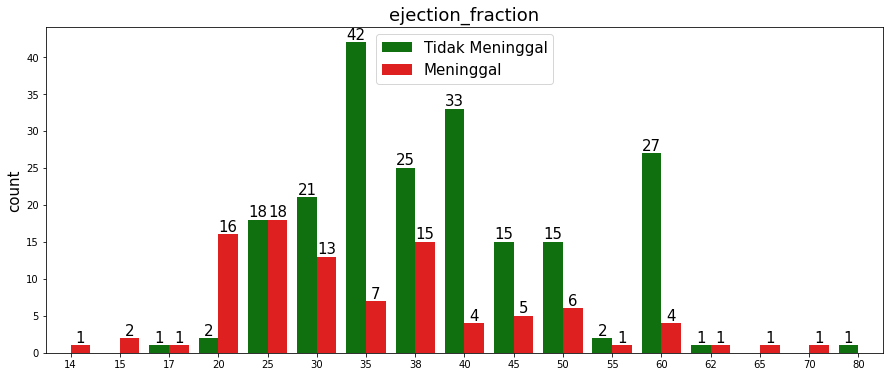

In [10]:
# Create countplot
dat_c = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex', 'ejection_fraction']
for col in dat_c:
    plt.figure(figsize=(15,6))
    plt.rcParams.update({'font.size': 15})
    plt.title(data[col].name)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
  
    ax = sns.countplot(x=data[col] ,data=data, hue='DEATH_EVENT', palette=('g','r'))
    plt.legend(labels=["Tidak Meninggal","Meninggal"])
    ax.set_xlabel("")
    for i in ax.containers:
        ax.bar_label(i,)

- Pada grafik anaemia, jumlah yang tidak terjangkit anaemia lebih banyak dibanding yang terjangkit anaemia. Jumlah yang meninggal karena anaemia ada sejumlah 46 orang dari 129 orang.

- Pada grafik diabetes, jumlah yang tidak terjangkit diabetes lebih banyak dibanding yang terjangkit diabetes. Total yang meninggal akibat diabetes ada 40 orang dari total yang terjangkit sejumlah 125 orang.

- Pada grafik tekanan darah tinggi, jumlah yang tidak bertekanan darah tinggi lebih banyak dibanding yang bertekanan darah tinggi. Jumlah yang meninggal akibat tekanan darah tinggi sejumlah 39 orang dari total 105 orang.

- Pada grafik yang merokok, jumlah yang tidak merokok lebih tinggi dibanding yang merokok. Orang yang meninggal akibat rokok ada sejumlah 30 orang dari 96 orang yang merokok.

- Pada grafik gender, 0 adalah wanita dan 1 adalah laki-laki. Kita mengetahui bahwa laki-laki jumlahnya lebih banyak dari perempuan. Total yang meninggal pada perempuan ada 34 orang dari 105 wanita dan laki-laki yang meninggal sejumlah 62 laki-laki dari 194 laki-laki. Bisa kita simpulkan 31% dari pasien laki-laki yang telah dicatatkan meninggal dari keseluruhan populasi laki-laki pada data dan 32% dari pasien wanita yang meninggal dari keseluruhan populasi wanita pada data.

     **"Diabetes tidak berhubungan langsung dengan anemia. namun pada diabetes, maka penyakit diabetes dapat merusak pembuluh darah pada tubuh dan dapat menyebabkan gangguan ginjal dalam jangka waktu yang lama jika tidak dikontrol. Gangguan fungsi ginjal tersebut dapat menyebabkan terjadinya anemia". (sumber: alodokter.com).**
     

- Jika kita lihat pada grafik jumlah yang terkena anaemia dan diabetes hampir serupa, berdasarkan dari informasi dari alodokter.com, bahwa penderita diabetes bisa terkena anemia. Bisa kita simpulkan banyak pasien dari data kita yang meninggal dengan mengidap kedua penyakit tersebut.

    **"Nikotin di dalam rokok dapat menyebabkan peningkatan tekanan darah dan frekuensi denyut jantung. Ketika masuk ke dalam tubuh, nikotin akan memberi sinyal pada otak untuk melepaskan hormon adrenalin. Hormon ini akan membuat diameter pembuluh darah menjadi mengecil sehingga berisiko terjadinya peningkatan tekanan darah. Lebih jauh lagi, zat berbahaya tersebut dapat menimbulkan kerusakan pada dinding pembuluh darah". (sumber: klikdokter.com).**

    **"Pasien dengan diabetes memiliki risiko lebih tinggi terhadap penyakit kardiovaskuler dan merokok bisa meningkatkan risiko tersebut. Karena itu semua orang baik yang diabetes atau tidak harus berhenti merokok," ujar Dr Joel Zonszein, direktur dari Clinical Diabetes Center di Montefiore Medical Center, New York City (Sumber : health.detik.com).**
    

- Jika dilihat dari grafik yang merokok dengan tekanan darah tinggi, grafik menunjukkan jumlah yang hampir serupa menandakan ada hubungannya antara perokok dengan tekanan darah tinggi, dari artikel health.detik.com dan klikdokter.com, ternyata memperkuat hipotesa kita bahwa perokok dapat menyebabkan tekanan darah tinggi ataupun diabetes. Dari kesimpulan tersebut merokok tidak menyebabkan kematian, tetapi menyebabkan penyakit penyebab kematian.


- Ejection Fraction menggambarkan persentase darah yang dipompa keluar oleh ruang jantung kiri saat berkontraksi, dengan nilai normalnya 55-70%. Dari grafik yang kita miliki bahwa rata-rata kebanyakan pasien memiliki persentase di 35%, sedangkan yang meninggal banyak di persentase 25% yang mana jauh dari batas normal. Jika dilihat persentase di atas 50% atau normal sangat sedikit yang meninggal dibandingkan yang dibawah normal. Kita mengetahui bahwa Ejection Fraction sangat berpengaruh ke jumlah kematian seseorang.

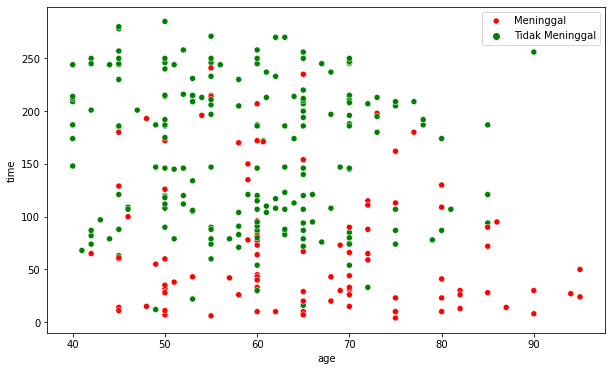

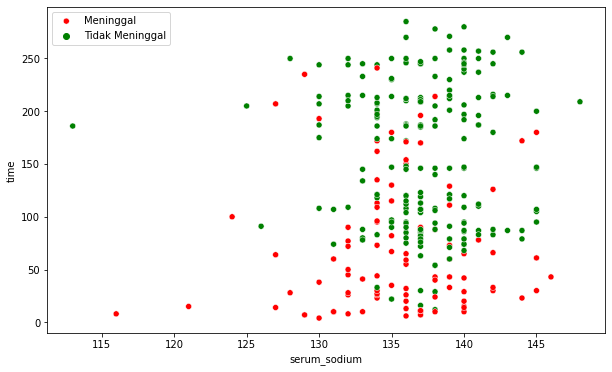

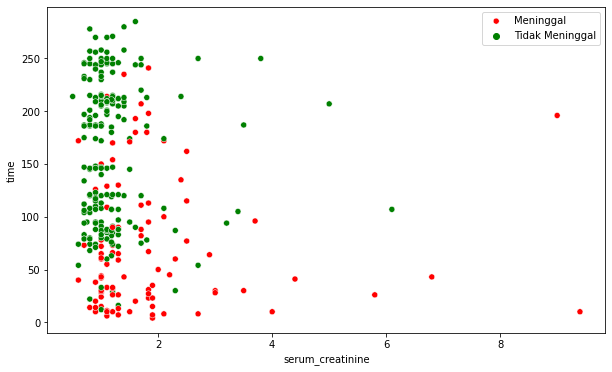

In [11]:
# Create Scatter Plot

dat_n = ['age','serum_sodium','serum_creatinine']

for coln in dat_n:
    plt.figure(figsize=(10,6))
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.rcParams.update({'font.size': 10})
    sns.scatterplot(x=data[coln], y='time' , hue='DEATH_EVENT', palette=('g','r'), data=data)
    plt.legend(labels=["Meninggal", "Tidak Meninggal"])

- Pada penyebaran umur dengan waktu kematian, kita ketahui bahwa umur sangat berpengaruh dengan ketahanan dari penyakit. Dari umur termuda hingga umur 75 tahun ketahanan hidup masih cukup lama dibandingkan yang sudah berumur di atas 75 tahun, pasien di atas umur tersebut lebih rentan meninggal jika terkena penyakit.

- Normalnya serum sodium antara 135 and 145 milliequivalents per liter (mEq/L). Jika dilihat bahwa jika jauh di luar batas normal, kematian akan semakin cepat. Tetapi jika kita lihat pada data, di jangakuan batas normal banyak terjadi kematian. Ada kemungkinan walaupun dalam batas normal tetapi pasien memiliki kadar serum ceratine di luar batas normal ataupun pasien terkena penyakit lain.

- Normalnya serum creatinine adalah untuk Laki-laki dewasa dari 0.74 - 1.35 mg/dL dan untuk wanita dewasa dari 0.59 - 1.04 mg/dL. pada grafik rata-rata yang meninggal sudah melewati batas normal. Tetapi jika sudah terlampau jauh dari batas normal waktu kematian akan lebih cepat. Dari informasi ini kita ketaui bahwa serum creatinine berpengaruh dengan kematian seseorang.

# 5 - Data Preprocessing

### Data Inference

In [12]:
# Get Data Inference

df_inf = data.sample(10,random_state=17)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
138,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
288,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
139,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
13,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
58,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
122,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [13]:
# Remove Inference-Set from Data-Set

df_tr_ts = data.drop(df_inf.index)
df_tr_ts

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [14]:
# Reset index data inference and data-set

df_tr_ts.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


### Data Train and Test

In [15]:
# Split X (Features) and y (Target)

X = df_tr_ts.drop('DEATH_EVENT', axis=1)
y = df_tr_ts['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
284,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
285,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
286,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
287,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [16]:
# Split between Train-Set and Test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (231, 12)
Test Size : (58, 12)


## Check Outliers

age Skewness : 0.4230619067286355
age Kurtosis : -0.1848705319541737


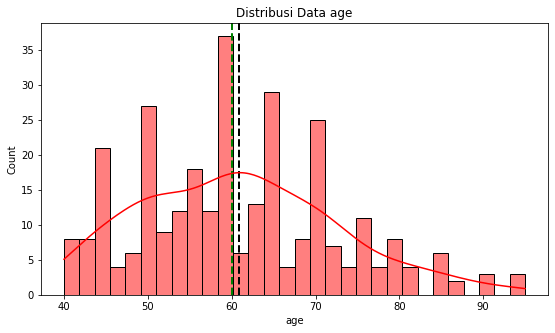



serum_sodium Skewness : -1.0481360160574988
serum_sodium Kurtosis : 4.119712007624292


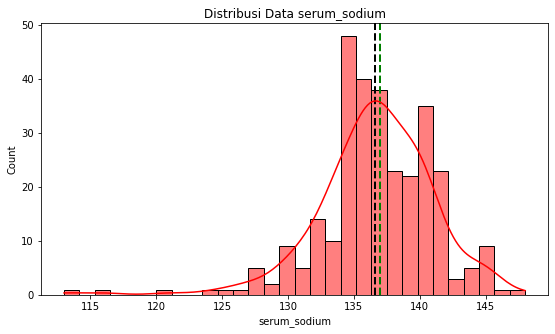



serum_creatinine Skewness : 4.455995882049029
serum_creatinine Kurtosis : 25.828238661132016


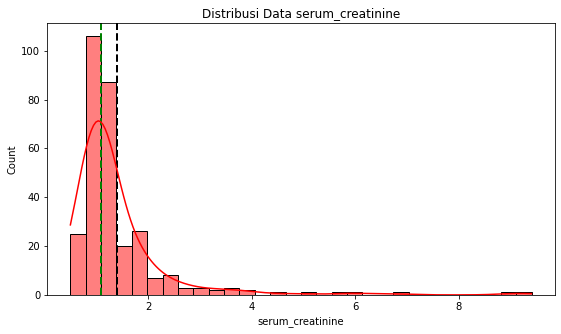

In [17]:
# Create Histogram Distribution

for col in dat_n:
    print(data[col].name + ' Skewness :',data[col].skew())
    print(data[col].name + ' Kurtosis :',data[col].kurt())
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.axvline(data[col].mean(), color='black', linestyle='dashed', linewidth=2)
    plt.axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
    plt.title('Distribusi Data ' + data[col].name)
    sns.histplot(data[col], bins=30, kde=True, color='red')
    plt.show()
    print('\n')

- pada beberapa data numerik terdapat skew. 
- Pada data age dan time data terdistribusi normal, pada data ejection fraction data terlihat ada skew sedikit sekitar 0.05, tetapi kita masih bisa anggap normal. 
- Pada creatinine phosphokinase, ejection fraction, platelets dan serum creatinine semuanya terindikasi right skew dimana outliers terdeteksi cukup banyak. Pada data serum sodium terdapat left skew dimana nilai data tinggi di nilai yang tinggi dan tertinggi di 135.
- Karena ini merupakan data penyakit, kita tidak akan melakukan penghilangan outliers. Tetapi kita akan mencoba melakukan penambahan data pada data minority.

## Feature Selection

In [18]:
# Split data numerik and category

dat_num = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium', 'time']
dat_cat = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

### Kbest with Anova

In [19]:
# Kbest with anova

f_test = SelectKBest(score_func=f_classif, k=4)
fit = f_test.fit(X_train[dat_num], y_train)
fit.scores_

array([1.98082743e+01, 1.49734224e-02, 2.03813180e+01, 1.06480675e-03,
       2.09120789e+01, 7.31007275e+00, 1.22906372e+02])

In [20]:
# Create dataframe and show result

result = pd.Series(fit.scores_)
result.index = X_train[dat_num].columns
result.sort_values(ascending=False)

time                        122.906372
serum_creatinine             20.912079
ejection_fraction            20.381318
age                          19.808274
serum_sodium                  7.310073
creatinine_phosphokinase      0.014973
platelets                     0.001065
dtype: float64

Feature dari data numerik yang memiliki hubungan dengan target adalah time, serum creatinine, ejection fraction, serum sodium dan age. Data tersebut akan kita jadikan sebagai feature pada model yang kita bangun.

### Kbest with Chi Square

In [21]:
# Kbest with chi square

f_test = SelectKBest(score_func=chi2, k=4)
fit = f_test.fit(X_train[dat_cat], y_train)
fit.scores_

array([6.48284314e-01, 7.16518170e-02, 1.41958899e+00, 2.03823733e-05,
       2.52872416e-01])

In [22]:
# Create dataframe and show result

chi = pd.Series(fit.scores_)
chi.index = X_train[dat_cat].columns
chi.sort_values(ascending=False)

high_blood_pressure    1.419589
anaemia                0.648284
smoking                0.252872
diabetes               0.071652
sex                    0.000020
dtype: float64

Dari data kategori yang memiliki hubungan dengan target adalah high_blood_pressure. high blood pressure akan kita jadikan feature pada model yang kita bangun.

## Scalling

In [23]:
# Split between category and numeric features

num_d = ['time','serum_creatinine','ejection_fraction','age']
cat_d = ['high_blood_pressure'] 

In [24]:
# Split between numeric and category data for data train and test

X_train_num = X_train[num_d]
X_test_num = X_test[num_d]

In [25]:
# feature scaling menggunakan MinMaxScaller

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled

array([[0.72953737, 0.04494382, 0.4       , 0.        ],
       [0.21708185, 0.08988764, 0.        , 0.03636364],
       [0.38790036, 0.05617978, 0.9       , 0.43636364],
       [0.1316726 , 0.43820225, 0.1       , 0.72727273],
       [0.03914591, 0.15730337, 0.8       , 0.14545455],
       [0.75088968, 0.07865169, 0.4       , 0.54545455],
       [0.33096085, 0.08988764, 0.7       , 0.05454545],
       [0.09252669, 0.33707865, 0.4       , 0.52727273],
       [0.08540925, 0.28089888, 0.6       , 0.81818182],
       [0.44483986, 0.06741573, 0.3       , 0.09090909],
       [0.02491103, 0.06741573, 0.46      , 0.18181818],
       [0.29537367, 0.05617978, 0.3       , 0.03636364],
       [0.87544484, 0.37078652, 0.3       , 0.03636364],
       [0.62633452, 0.07640449, 0.3       , 0.6       ],
       [0.71530249, 0.1011236 , 0.9       , 0.63636364],
       [0.87544484, 0.24719101, 0.5       , 0.54545455],
       [0.90035587, 0.03370787, 0.8       , 0.09090909],
       [0.64768683, 0.05617978,

Data numerik akan di scalling dengan menggunakan metode MinMax, dikarenakan data numerik yang kita miliki lebih dominan dengan data yang skew.

In [26]:
X_train_final = np.concatenate([X_train_scaled, X_train[cat_d]], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[cat_d]], axis=1)

X_train_final

array([[0.72953737, 0.04494382, 0.4       , 0.        , 0.        ],
       [0.21708185, 0.08988764, 0.        , 0.03636364, 0.        ],
       [0.38790036, 0.05617978, 0.9       , 0.43636364, 0.        ],
       ...,
       [0.02491103, 0.06741573, 0.3       , 0.09090909, 0.        ],
       [0.87544484, 0.07865169, 0.5       , 0.27272727, 0.        ],
       [0.19572954, 0.08988764, 0.1       , 0.58181818, 1.        ]])

## Resampling

In [27]:
# Smotenc definition

sm = SMOTENC(random_state=42, categorical_features=[0])

In [28]:
# fit smotenc in data to varibel

X_res, y_res = sm.fit_resample(X_train_final, y_train)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({0: 153, 1: 153})


Melakukan resampling data pada data minority untuk ditingkatkan jumlahnya agar sama dengan data majority. Di kasus ini data terindikasi meninggal yes akan ditambah agar data balance dengan data yang terindikasi meninggal no. Hal ini dilakukan untuk melihat kinerja model jika data seimbang. Resampling dilakukan dengan membuat data syntetic.

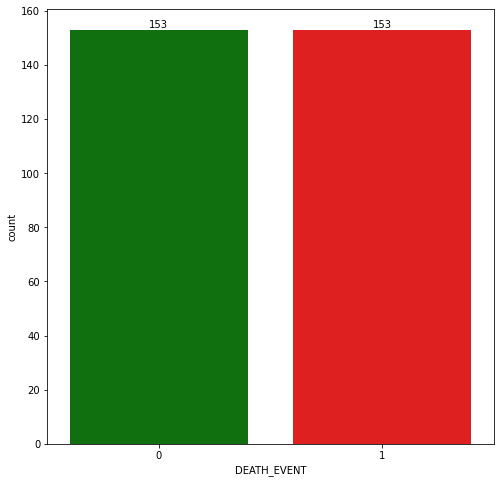

In [29]:
# Create count Target Resampling

plt.figure(figsize=(8,8))
resampling = sns.countplot(data=y_res, x=y_res, palette=('g','r'))
resampling.bar_label(resampling.containers[0], label_type='edge');

Setelah dilakukan Resampling, data menjadi seimbang antara terindikasi meninggal yes dan terindikasi meninggal no.

# 6 - Model Definition

In [30]:
# Definition model into variabel

rf_model = RandomForestClassifier(criterion='entropy',n_estimators=10, 
                                  max_depth=10, random_state=150)
ada_model = AdaBoostClassifier(n_estimators=10,algorithm='SAMME', 
                               base_estimator=None, random_state=45)

rf_r_model = RandomForestClassifier(criterion='entropy',n_estimators=10, 
                                  max_depth=10, random_state=150)
ada_r_model = AdaBoostClassifier(n_estimators=10,algorithm='SAMME', 
                               base_estimator=None, random_state=45)

# 7 - Model Training

In [31]:
rf_model.fit(X_train_final, y_train)
rf_r_model.fit(X_res, y_res)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=150)

Pada model Random Forest, kita menggunakan beberapa parameter:
- Criterion kita menggunakan entropy, untuk mengukur kualitas split dalam perolehan informasi.
- Max depth = 10 , yaitu maksimal kedalaman root node yang akan dibentuk pada model Random forest.
- n_estimator = 10, banyaknya tree pada forest sejumlah 10.
- Random_state = 150, seed yang digunakan oleh generator angka acak sebanyak 150.

Parameter di atas untuk saat ini adalah parameter terbaik yang didapatkan setelah beberapa uji coba.

In [32]:
ada_model.fit(X_train_final, y_train)
ada_r_model.fit(X_res, y_res)

AdaBoostClassifier(algorithm='SAMME', n_estimators=10, random_state=45)

Pada model Adaboost, kita menggunakan beberapa parameter:
- algorithm = SAMME
- n_estimator = 10, Jumlah maksimum estimator di mana boosting dihentikan.
- Random_state = 45, seed yang digunakan oleh generator angka acak sebanyak 45.

Parameter di atas untuk saat ini adalah parameter terbaik yang didapatkan setelah beberapa uji coba.

# 8 - Model Evaluation

### MODEL RANDOM FOREST

In [33]:
# Show Metrick Evaluation Random Forest

# predict train and test 
y_pred_train_rf = rf_model.predict(X_train_final)
y_pred_test_rf = rf_model.predict(X_test_final)

# probability train and test
y_prob_train = rf_model.predict_proba(X_train_final)[:,1]
y_prob_test = rf_model.predict_proba(X_test_final)[:,1]

# predict train and test Resampling
y_pred_r_train_rf = rf_r_model.predict(X_res)
y_pred_r_test_rf = rf_r_model.predict(X_test_final)

# probability train and test Resampling
y_prob_r_train = rf_r_model.predict_proba(X_res)[:,1]
y_prob_r_test = rf_r_model.predict_proba(X_test_final)[:,1]

    
print('Random-Forest')
print("="*25,"TRAINING","="*25)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*27,"TEST","="*27)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))
print("\n")
print('Random-Forest-Resampling')
print("="*25,"TRAINING","="*25)
print(classification_report(y_res, y_pred_r_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_res, y_prob_r_train))
print("="*27,"TEST","="*27)
print(classification_report(y_test, y_pred_r_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_r_test))

Random-Forest
========================= TRAINING =========================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      0.99        78

    accuracy                           1.00       231
   macro avg       0.99      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

ROC-AUC Score Train: 0.9998743086978381
=========================== TEST ===========================
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.40      0.62      0.48        13

    accuracy                           0.71        58
   macro avg       0.63      0.67      0.64        58
weighted avg       0.76      0.71      0.73        58

ROC-AUC Score Test: 0.764102564102564


Random-Forest-Resampling
========================= TRAINING =========================
              precision    recall  f1-score 

- Hasil yang didapatkan dari model sangatlah baik pada data training, jika dilihat dari nilai recall pada penebakan nila 0 dan 1 akurasi sama-sama mendapatkan skor 0.99 dengan accuracy 0.99. Nilai Precision dan f1-score juga sangat bagus, dimana hanya berbeda 0.01 - 0.02.
- Pada model Training yang sudah di Resampling sangatlah bagus skor yang dihasilkan yaitu 0.99.
- Pada data test nilai recall masih dibawah data training, artinya model kita Overfit.

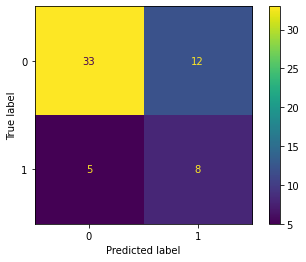

In [34]:
# Confussion matrix show the result Random Forest

cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_) 
disp.plot()
plt.show()

Coefissin matrix Random Forest:

- Dari coefission matrix pada data test, didapatkan hasil bahwa model sangat baik memprediksi yang meninggal no, disebabkan data tidaklah seimbang.
- Jika kita lihat yang meninggal yes cukup bagus dalam memprediksi sejumlah delapan.
- Error dari keduanya pada True Negatif sejumlah 5 dan False Negatif sejumlah 12.
- Dengan data hanya sejumlah 58 pada data test, model dapat mengurangi error. Total score ROC-AUC hanya 0.76 yang mana sangat jauh dari data training yang mendapatkan skor 0.99.

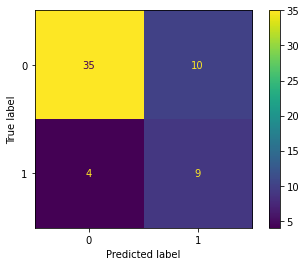

In [35]:
# Confussion matrix show the result Random Forest Resampling

cm = confusion_matrix(y_test, y_pred_r_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_) 
disp.plot()
plt.show()

Coefissin matrix Random Forest Resampling:

- Dari coefission matrix pada data test, didapatkan hasil bahwa model sangat baik memprediksi yang meninggal no, disebabkan data tidaklah seimbang.
- Jika kita lihat yang meninggal yes cukup bagus dalam memprediksi sejumlah 9, lebih baik sedikit dari data yang belum di sampling.
- Error dari keduanya pada True Negatif sejumlah 4 dan False Negatif sejumlah 10.
- Dengan data hanya sejumlah 58 pada data test, model dapat mengurangi error. Total score ROC-AUC hanya 0.76 yang mana sangat jauh dari data training yang mendapatkan skor 0.99.

### MODEL ADABOOST

In [36]:
# Show Metrick Evaluation Adaboost
    
# predict train and test 
y_pred_train_ada = ada_model.predict(X_train_final)
y_pred_test_ada = ada_model.predict(X_test_final)

# probability train and test
y_prob_train = ada_model.predict_proba(X_train_final)[:,1]
y_prob_test = ada_model.predict_proba(X_test_final)[:,1]

# predict train and test Resampling
y_pred_r_train_ada = ada_r_model.predict(X_res)
y_pred_r_test_ada = ada_r_model.predict(X_test_final)

# probability train and test Resampling
y_prob_r_train = ada_r_model.predict_proba(X_res)[:,1]
y_prob_r_test = ada_r_model.predict_proba(X_test_final)[:,1]
   

print('Adaboost')
print("="*25,"TRAINING","="*25)
print(classification_report(y_train, y_pred_train_ada, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*27,"TEST","="*27)
print(classification_report(y_test, y_pred_test_ada, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))
print('\n')
print('Adaboost-Resampling')
print("="*25,"TRAINING","="*25)
print(classification_report(y_res, y_pred_r_train_ada, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_res, y_prob_r_train))
print("="*27,"TEST","="*27)
print(classification_report(y_test, y_pred_r_test_ada, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_r_test))

Adaboost
========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       153
           1       0.92      0.77      0.84        78

    accuracy                           0.90       231
   macro avg       0.91      0.87      0.88       231
weighted avg       0.90      0.90      0.90       231

ROC-AUC Score Train: 0.9500586559410089
=========================== TEST ===========================
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.67      0.46      0.55        13

    accuracy                           0.83        58
   macro avg       0.76      0.70      0.72        58
weighted avg       0.81      0.83      0.82        58

ROC-AUC Score Train: 0.7948717948717949


Adaboost-Resampling
========================= TRAINING =========================
              precision    recall  f1-score   suppor

- Pada model Adaboost sebelum resampling, hasil pada data training dan test hanya bagus pada nilai 0 sedangakan nilai 1 sangatlah jauh. Skor keduanya pada data training 0.95 dan test 0.79, sangatlah Overfit. Dari recall juga terlihat keduanya sangatlah Overfit.
- Pada data yang sudah di Resampling, skor saling mendekati antara data train dan test. Walaupun masih Overfit tetapi tidak terlalu jauh. Dan kita bisa menggunakan model Adaboost sebagai model kita karena mendapatkan skor baik train dan test yang bagus dan masih mendekati.

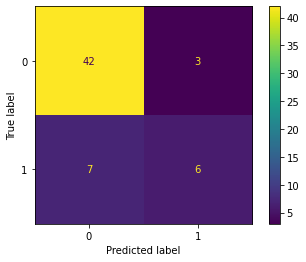

In [37]:
# Confussion matrix show the result Adaboost

cm = confusion_matrix(y_test, y_pred_test_ada, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)

disp.plot()
plt.show()

Coefissin matrix Adaboost :

- Dari coefission matrix pada data test, didapatkan hasil bahwa model sangat baik memprediksi yang meninggal no, disebabkan data tidaklah seimbang.
- Jika kita lihat yang meninggal no cukup bagus dalam memprediksi sejumlah 42.
- Error dari keduanya pada True Negatif sejumlah 7 dan False Negatif sejumlah 3.
- Dengan data hanya sejumlah 58 pada data test, model dapat mengurangi error. Total score ROC-AUC hanya 0.79 yang mana sangat jauh dari data training yang mendapatkan skor 0.95.

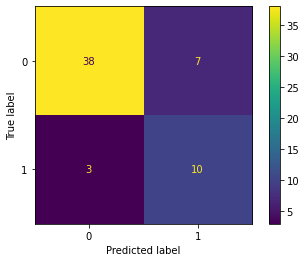

In [38]:
# Confussion matrix show the result Adaboost Resampling

cm = confusion_matrix(y_test, y_pred_r_test_ada, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)

disp.plot()
plt.show()

Coefissin matrix Adaboost Resampling :

- Dari coefission matrix pada data test, didapatkan hasil bahwa model sangat baik memprediksi yang meninggal no, disebabkan data tidaklah seimbang.
- Jika kita lihat yang meninggal no cukup bagus dalam memprediksi sejumlah 38 dan yang meninggal yes 10.
- Error dari keduanya pada True Negatif sejumlah 3 dan False Negatif sejumlah 7.
- Dengan data hanya sejumlah 58 pada data test, model dapat mengurangi error. Dengan total skor akurasi train 0.86 dan test 0.83.

# 9 - Model Inference

In [39]:
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [40]:
# Split between numeric and category data for data inference

X_inf_num = df_inf[num_d]

In [41]:
# feature scaling menggunakan MinMaxScaller

scaler.fit(X_inf_num)
X_inf_scaled = scaler.transform(X_inf_num)
X_inf_scaled

array([[0.81545064, 0.66428571, 0.        , 0.575     ],
       [0.36909871, 0.        , 1.        , 0.375     ],
       [0.4806867 , 0.07142857, 0.125     , 0.        ],
       [0.4248927 , 0.28571429, 1.        , 0.325     ],
       [0.60944206, 0.07142857, 0.125     , 0.225     ],
       [0.85407725, 0.21428571, 0.125     , 0.55      ],
       [0.        , 0.85714286, 0.5       , 1.        ],
       [0.87553648, 0.28571429, 0.25      , 0.375     ],
       [0.22317597, 1.        , 0.5       , 0.        ],
       [1.        , 0.66428571, 0.        , 0.125     ]])

In [42]:
# Concat inf scaled data and inf category data

df_inf_final = np.concatenate([X_inf_scaled, df_inf[cat_d]], axis=1)
df_inf_final

array([[0.81545064, 0.66428571, 0.        , 0.575     , 0.        ],
       [0.36909871, 0.        , 1.        , 0.375     , 1.        ],
       [0.4806867 , 0.07142857, 0.125     , 0.        , 0.        ],
       [0.4248927 , 0.28571429, 1.        , 0.325     , 1.        ],
       [0.60944206, 0.07142857, 0.125     , 0.225     , 0.        ],
       [0.85407725, 0.21428571, 0.125     , 0.55      , 0.        ],
       [0.        , 0.85714286, 0.5       , 1.        , 1.        ],
       [0.87553648, 0.28571429, 0.25      , 0.375     , 0.        ],
       [0.22317597, 1.        , 0.5       , 0.        , 1.        ],
       [1.        , 0.66428571, 0.        , 0.125     , 0.        ]])

In [43]:
# Create DataFrame inference final

pd.DataFrame(df_inf_final)

,0,1,2,3,4
0,0.815451,0.664286,0.000,0.575,0.0
1,0.369099,0.000000,1.000,0.375,1.0
2,0.480687,0.071429,0.125,0.000,0.0
3,0.424893,0.285714,1.000,0.325,1.0
4,0.609442,0.071429,0.125,0.225,0.0
5,0.854077,0.214286,0.125,0.550,0.0
6,0.000000,0.857143,0.500,1.000,1.0
7,0.875536,0.285714,0.250,0.375,0.0
8,0.223176,1.000000,0.500,0.000,1.0
9,1.000000,0.664286,0.000,0.125,0.0


In [44]:
# Do prediction on data inference with Random Forest

y_pred_inf = ada_r_model.predict(df_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted'])

In [45]:
# Concat between target inference with prediction inference

pd.concat([df_inf['DEATH_EVENT'], y_pred_inf_df], axis=1)

,DEATH_EVENT,Predicted
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1
5,0,1
6,1,1
7,0,0
8,1,1
9,1,0


Dari percobaan dengan data inference didapati model bisa benar memprediksi sejumlah 7 benar dan 3 salah. 

benar:
   - 1 =  4
   - 0 = 3
   
salah:

   - 1 = 1
   - 0 = 2
   
Tetapi model harus dicoba kembali dengan data yang lebih banyak untuk uji coba lebih lanjut pada model.

# 10 - Conclusions

Dari hasil analisa yang telah kita lakukan dapat ditarik kesimpulan bahwa beberapa data ada yang mempengaruhi kematina seperti time, serum_creatinine, ejection_fraction, age dan high_blood_pressure. Dari analisa EDA kita mengetahui bahwa semakin tua seseoran maka semakin cepat dalam waktu kematian jika terkena penyakit, dari data seseorang dengan umur di atas 75 tahun mengalami waktu kematian yang sangat cepat dibandingkan dengan yang berumur lebih muda. Normalnya serum creatinine adalah untuk Laki-laki dewasa dari 0.74 - 1.35 mg/dL dan untuk wanita dewasa dari 0.59 - 1.04 mg/dL. pada grafik rata-rata yang meninggal sudah melewati batas normal. Tetapi jika sudah terlampau jauh dari batas normal waktu kematian akan lebih cepat. Jumlah yang meninggal akibat tekanan darah tinggi sejumlah 39 orang dari total 105 orang dan salah satu penyebabnya terkena tekanan darah tinggi adalah perokok.

Ejection Fraction menggambarkan persentase darah yang dipompa keluar oleh ruang jantung kiri saat berkontraksi, dengan nilai normalnya 55-70%. Rata-rata kebanyakan pasien memiliki persentase di 35%, sedangkan yang meninggal banyak di persentase 25% yang mana jauh dari batas normal. Jika dilihat persentase di atas 50% atau normal sangat sedikit yang meninggal dibandingkan yang dibawah normal.

Anaemia sebenarnya berpengaruh dengan kematian dan memiliki hubungan dengan Diabetes. Tetapi karena tidak adanya hubungan setelah kita lakukan tes uji hipotesa dan pengaruhnya sangat kecil ke target kita maka tidak kita gunakan sebagai feature.

Dari percobaan model antara Random Forest dan Adaboost, baik yang sebelum di resampling dan sesudah di resampling. Hasil yang kita dapatkan bahwa model terbaik yang paling kecil Overfit nya adalah model Adaboost yang telah di resampling. Dengan skor akurasi 0.86 dan 0.83. Maka kita memilih model Adaboost sebagai Model yang kita gunakan untuk mendeteksi kematian seseorang.

# Conceptual Problems

1. Apakah yang dimaksud dengan Bagging?

    Jawab : Bagging bekerja dengan meningkatkan akurasi pembelajar yang lemah dengan melatih beberapa pembelajar sekaligus pada beberapa set data.

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

    Jawab : 

    - Random Forest bekerja dengan membangun beberapa decision tree dan menggabungkannya untuk mendapatkan prediksi yang lebih stabil dan akurat. Algoritma Random Forest meningkatkan keacakan pada model sambil menumbuhkan tree.Random Forest **mencari fitur terbaik** di antara subset fitur yang acak dalam penentuan node.

    - AdaBoost memberikan bobot yang sama untuk setiap set data. Kemudian, secara otomatis menyesuaikan bobot titik data setiap decision tree. AdaBoost memberikan **bobot lebih pada item dengan klasifikasi yang salah** agar diperbaiki di putaran berikutnya.